In [10]:
#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training/09.%20MT%20-%20MultinomialNB.ipynb

import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [11]:
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The training accuracy is: 
0.9
The test accuracy is: 
0.895797351755901


In [13]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1507
           1       0.97      0.86      0.91       969
           2       0.79      0.86      0.82       162
           3       0.87      0.77      0.81       100
           4       0.88      0.33      0.48        21
           5       0.97      0.91      0.94        43
           6       0.97      0.98      0.98       107
           7       0.74      0.45      0.56        83
           8       0.92      0.93      0.92       238
           9       0.83      0.14      0.23        37
          10       0.82      0.87      0.84       115
          11       0.94      0.97      0.95        75
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00         4

    accuracy                           0.90      3474
   macro avg       0.70      0.60      0.63      3474
weig

/home/kelu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


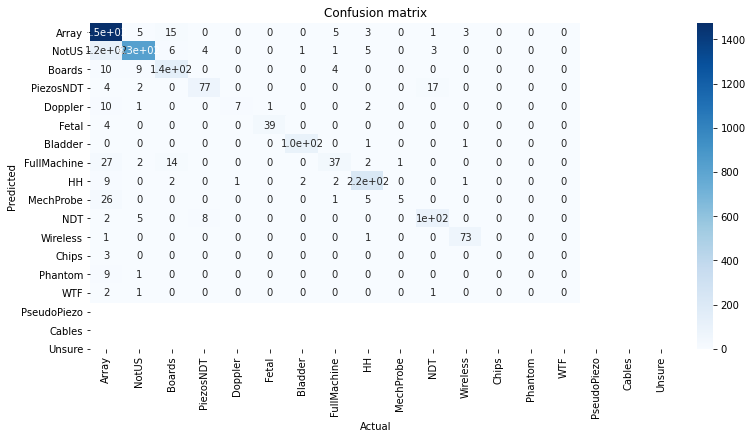

In [14]:
aux_df = df[['group', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['group'].values, 
            yticklabels=aux_df['group'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [15]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [16]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.9,0.895797


In [17]:
with open('Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)

# Testing the model

In [18]:
pathPickle = "Pickles"

path_X_train = pathPickle+"/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# X_test
path_X_test = pathPickle+"/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_train
path_y_train = pathPickle+"/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# y_test
path_y_test = pathPickle+"/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

path_category_names = pathPickle+"/category_names.pickle"
with open(path_category_names, 'rb') as data:
    category_names = pickle.load(data)
    
path_category_codes = pathPickle+"/category_codes.pickle"
with open(path_category_codes, 'rb') as data:
    category_codes = pickle.load(data)